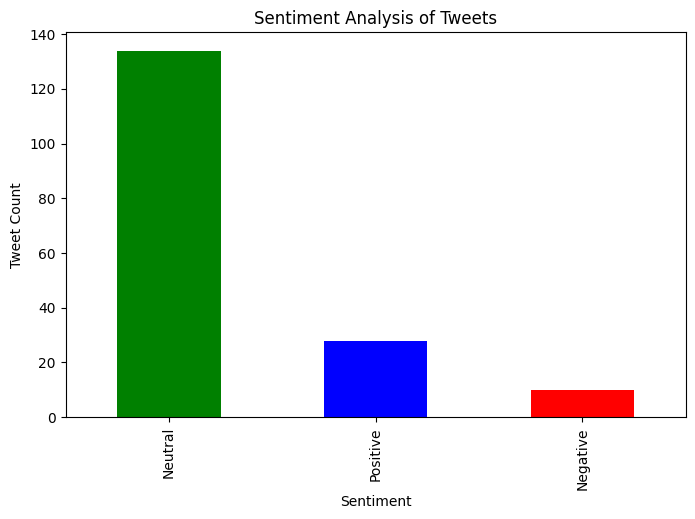

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import plotly.io as pio

# Force plotly to open plots in the browser
pio.renderers.default = "browser"

# Load CSV
df = pd.read_csv(r"C:\Users\mukke\Downloads\twitter.csv", on_bad_lines="skip", engine="python")
df.drop_duplicates(inplace=True)

# Detect text column
text_column = 'content' if 'content' in df.columns else df.columns[0]
df.dropna(subset=[text_column], inplace=True)

# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment
df['Sentiment'] = df[text_column].apply(get_sentiment)

# Matplotlib sentiment count plot
plt.figure(figsize=(8, 5))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# Prepare data for plotly
sentiment_counts_df = df['Sentiment'].value_counts().reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']

# Plotly bar chart (opens in browser)
fig = px.bar(sentiment_counts_df,
             x='Sentiment', y='Count',
             labels={'Sentiment': 'Sentiment', 'Count': 'Count'},
             color='Sentiment')
fig.show()

# WordClouds for positive & negative tweets
pos_text = " ".join(df[df['Sentiment'] == 'Positive'][text_column])
neg_text = " ".join(df[df['Sentiment'] == 'Negative'][text_column])

pos_wc = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
neg_wc = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

# Show Positive WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets WordCloud")
plt.show()

# Show Negative WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets WordCloud")
plt.show()
